# **Task_32**

K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('/content/drive/MyDrive/ByteWise Tasks/file.csv')

In [123]:
# Selecting numerical features for clustering
features = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]


In [124]:
# Splitting the dataset into training and testing sets
X = df[features]
y = df['Weather']  # Assuming 'Weather' is the target

In [125]:
# Standardizing the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

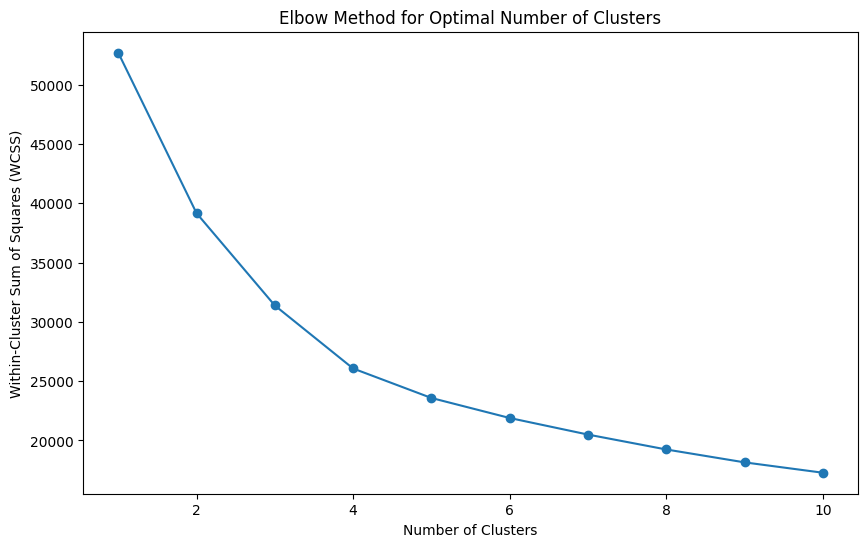

In [126]:
# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# From the Elbow Method plot, choose the optimal number of clusters (e.g., k=3)
optimal_clusters = 3

**Applying KMeans with the optimal number of clusters**

In [127]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_std)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


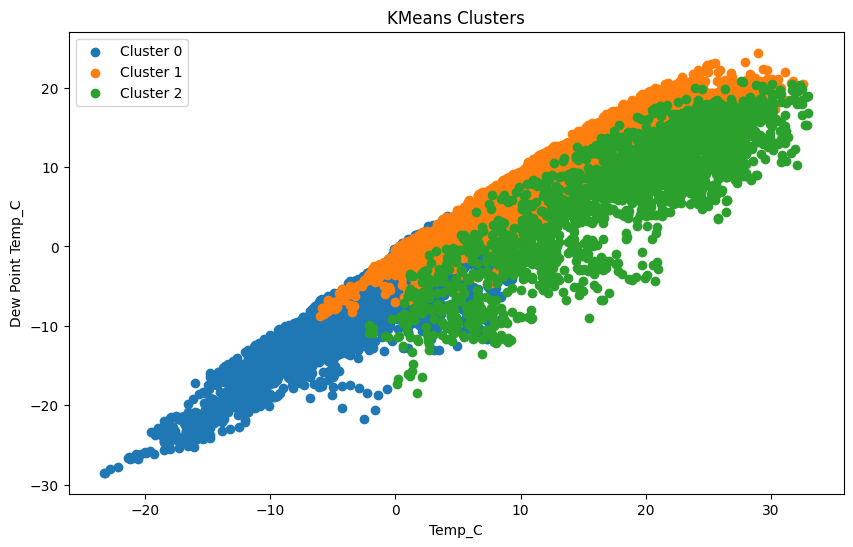

Original Data Shape: (8784, 6)
Clustered Data Shape: (8784, 9)


In [128]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    indices = df['Cluster'] == cluster
    plt.scatter(df.loc[indices, 'Temp_C'], df.loc[indices, 'Dew Point Temp_C'], label=f'Cluster {cluster}')
plt.xlabel('Temp_C')
plt.ylabel('Dew Point Temp_C')
plt.title('KMeans Clusters')
plt.legend()
plt.show()

# Display the results
print("Original Data Shape:", X.shape)
print("Clustered Data Shape:", df.shape)